In [18]:
import json
import cv2
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from ultralytics import YOLO

In [1]:
import torch
print(torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

2.6.0+cu118
cuda


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [30]:
pie_val_path = "./../assets/dataset/test/piedata(1008)/pie/annotations/instancesPie(1008)_test2019.json"

with open(pie_val_path, 'r') as f:
    pie_val = json.load(f)

In [45]:
pie_val.keys()

dict_keys(['licenses', 'images', 'annotations', 'categories'])

In [46]:
df = pd.DataFrame(pie_val['annotations'])
df

,image_id,category_id,bbox,area,id
0,73075,0,"[191.0, 32.0, 285.0, 184.0, 191.0, 137.0]",11225.039932,422950
1,73075,0,"[285.0, 184.0, 223.0, 237.0, 191.0, 137.0]",4399.705457,422951
2,73075,0,"[223.0, 237.0, 172.0, 240.0, 191.0, 137.0]",2705.904134,422952
3,73075,0,"[172.0, 240.0, 135.0, 226.0, 191.0, 137.0]",2088.187248,422953
4,73075,0,"[135.0, 226.0, 109.0, 203.0, 191.0, 137.0]",1834.405884,422954
5,73075,0,"[109.0, 203.0, 94.0, 176.0, 191.0, 137.0]",1625.541443,422955
6,73075,0,"[94.0, 176.0, 87.0, 152.0, 191.0, 137.0]",1312.967120,422956
7,73075,0,"[87.0, 152.0, 191.0, 32.0, 191.0, 137.0]",9455.495214,422957
8,73076,0,"[174.0, 32.0, 261.0, 196.0, 174.0, 137.0]",11957.547223,422958
9,73076,0,"[261.0, 196.0, 209.0, 236.0, 174.0, 137.0]",3504.879628,422959


In [31]:
image_df = pd.DataFrame(pie_val['images']) 
image_df 

,file_name,height,width,id
0,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,331,73075
1,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,303,73076
2,f449d055d0020a85e6991e21e4b8e2df_d3d3LnphcG9wY...,331,535,73077
3,f449d8f2044f441270110f1a3774ff04_d3d3LnNoaXJ1c...,376,737,73078
4,f44a875dc618aacc6fc8a09105a2b163_bWFpbC50ZGItZ...,342,347,73079
5,f44a875dc618aacc6fc8a09105a2b163_bWFpbC50ZGItZ...,342,493,73080
6,f44a875dc618aacc6fc8a09105a2b163_bWFpbC50ZGItZ...,297,461,73081
7,f44b2c2c3d23a3aef554b3b2a3a681da_ZG9jZW50aS5sd...,312,626,73082
8,f44b2c2c3d23a3aef554b3b2a3a681da_ZG9jZW50aS5sd...,306,625,73083
9,f44b2c2c3d23a3aef554b3b2a3a681da_ZG9jZW50aS5sd...,312,642,73084


In [35]:
first_image = pie_val['images'][0]
idx = first_image['id']
file_name = first_image['file_name']
bboxs = [ann for ann in pie_val['annotations'] if ann['image_id'] == idx]

print(f"Image ID: {idx}")
print(f"File Name: {file_name}")
for i, b in enumerate(bboxs):
    print(f"Box {i + 1}: {b['bbox']}")

Image ID: 73075
File Name: f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-0.png
Box 1: [191.0, 32.0, 285.0, 184.0, 191.0, 137.0]
Box 2: [285.0, 184.0, 223.0, 237.0, 191.0, 137.0]
Box 3: [223.0, 237.0, 172.0, 240.0, 191.0, 137.0]
Box 4: [172.0, 240.0, 135.0, 226.0, 191.0, 137.0]
Box 5: [135.0, 226.0, 109.0, 203.0, 191.0, 137.0]
Box 6: [109.0, 203.0, 94.0, 176.0, 191.0, 137.0]
Box 7: [94.0, 176.0, 87.0, 152.0, 191.0, 137.0]
Box 8: [87.0, 152.0, 191.0, 32.0, 191.0, 137.0]


In [36]:
x1, y1, x2, y2, xc, yc = bboxs[0]["bbox"] 
x1, y1, x2, y2, xc, yc

(191.0, 32.0, 285.0, 184.0, 191.0, 137.0)

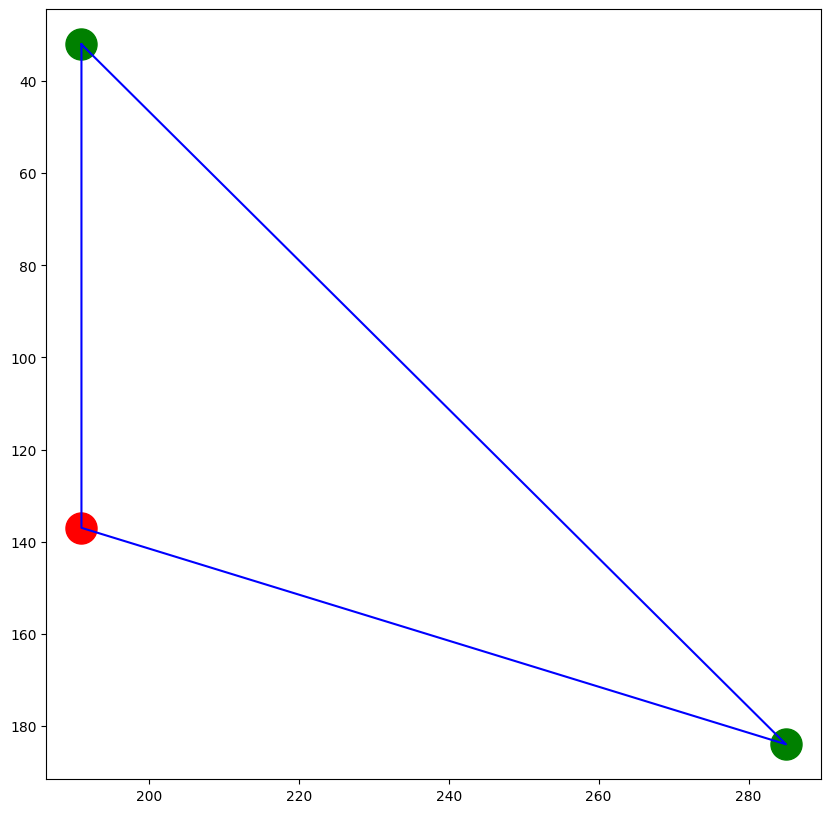

In [49]:
plt.figure(figsize=(10, 10))

# Draw point
plt.scatter(xc, yc, color='red', s=500)
plt.scatter(x1, y1, color='green', s=500)
plt.scatter(x2, y2, color='green', s=500)

# Draw triangle
plt.plot([x1, x2, xc, x1], [y1, y2, yc, y1], color='blue')

# Invert y 
plt.gca().invert_yaxis()


In [38]:
image_path = "./../assets/dataset/test/piedata(1008)/pie/images/test2019/" + file_name

[ WARN:0@1572,509] global loadsave.cpp:241 findDecoder imread_('./../assets/dataset/reduced_data/piedata(1008)/pie/images/val2019/f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-0.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

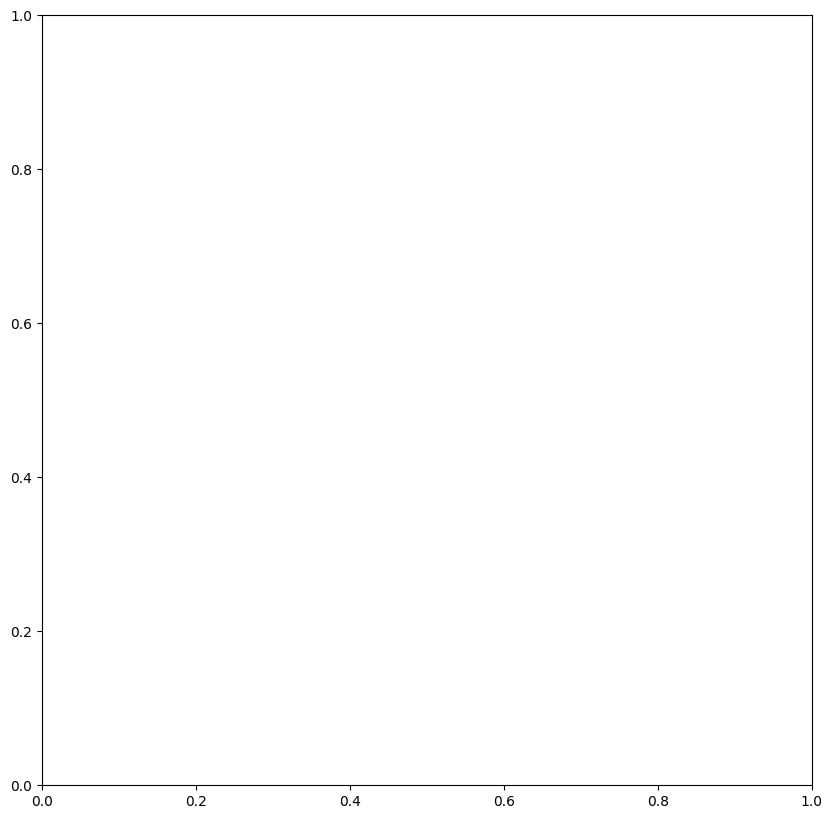

In [43]:
plt.figure(figsize=(10, 10))

image = cv2.imread(image_path)

plt.imshow(image)

In [39]:
image_df[image_df['file_name'] == file_name]

,file_name,height,width,id
0,f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzL...,273,331,73075


[ WARN:0@1544,650] global loadsave.cpp:241 findDecoder imread_('./../assets/dataset/reduced_data/piedata(1008)/pie/images/val2019/f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-0.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

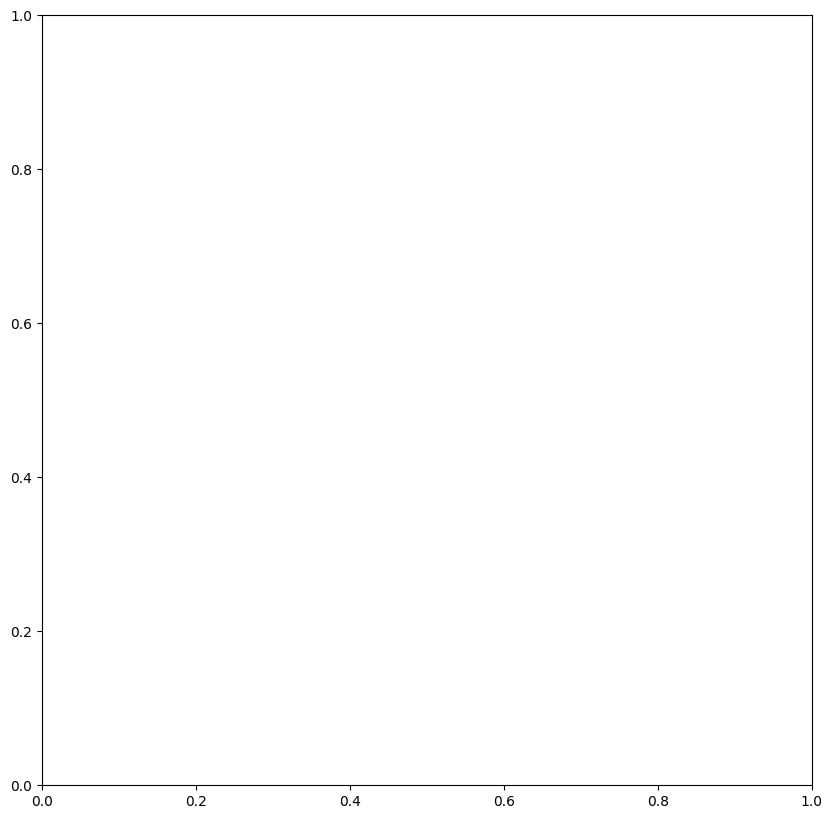

In [42]:
plt.figure(figsize=(10, 10))
image = cv2.imread(image_path)
plt.imshow(image)
plt.savefig("./../assets/images/pie.png")

In [ ]:
image.shape

(352, 586, 4)

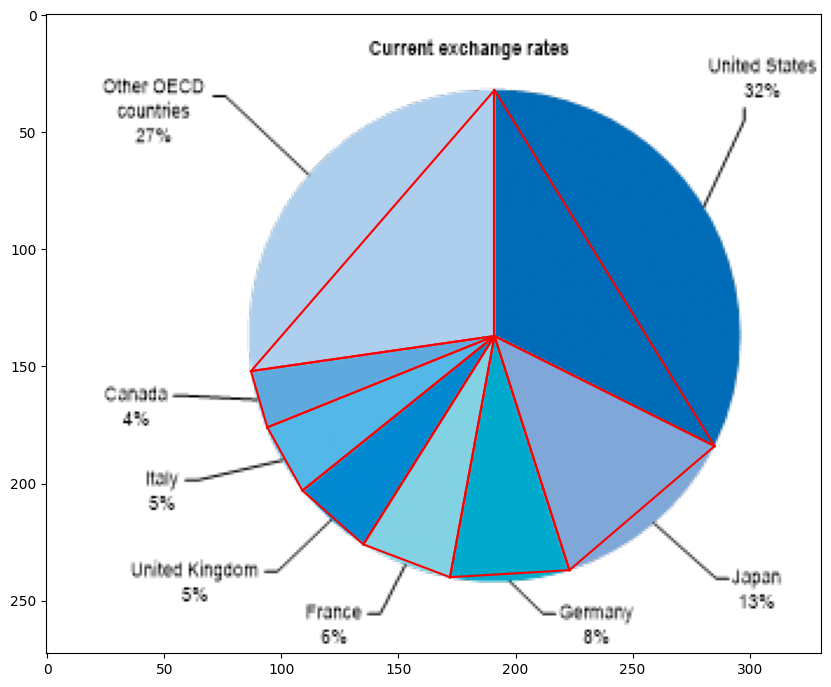

In [ ]:
plt.figure(figsize=(10, 10))
image = plt.imread(image_path)

for bbox in bboxs:
    arc_1_x, arc_1_y, arc_2_x, arc_2_y, center_x, center_y = bbox['bbox']
    plt.plot([arc_1_x, arc_2_x], [arc_1_y, arc_2_y], 'r')
    plt.plot([arc_2_x, center_x], [arc_2_y, center_y], 'r')
    plt.plot([center_x, arc_1_x], [center_y, arc_1_y], 'r')
    
plt.imshow(image)
plt.savefig("./../assets/images/pie_bbox.png")

In [ ]:
image.shape

(352, 586, 4)

In [ ]:
model = YOLO("./segmentation/runs/segment/train4/weights/best.pt")

In [ ]:
results = model(image_path)[0]
results.save("./../assets/images/pie_segmented.png")


image 1/1 /media/vietz/Data5/FPT/2025/SPRING/DPL302m/ASSIGNMENTS_AND_EXAMS/PROJECTS/ChartInsight/testing/../assets/dataset/test/piedata(1008)/pie/images/test2019/f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-0.png: 544x640 8 Seriess, 53.3ms
Speed: 2.2ms preprocess, 53.3ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)


'./../assets/images/pie_segmented.png'

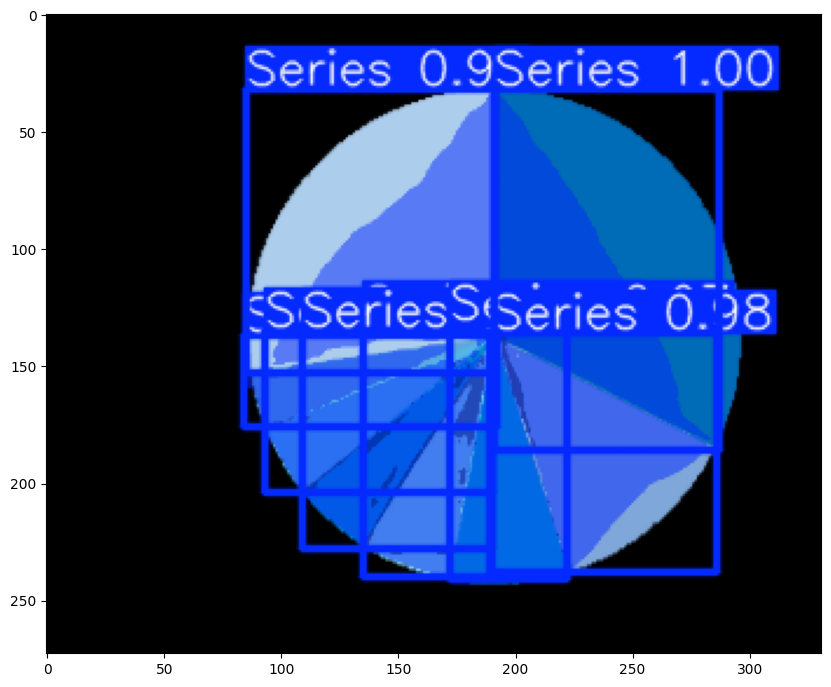

In [ ]:
plt.figure(figsize=(10, 10))
image = plt.imread("./../assets/images/pie_segmented.png")
plt.imshow(image)

In [ ]:
image.shape

(352, 586, 3)

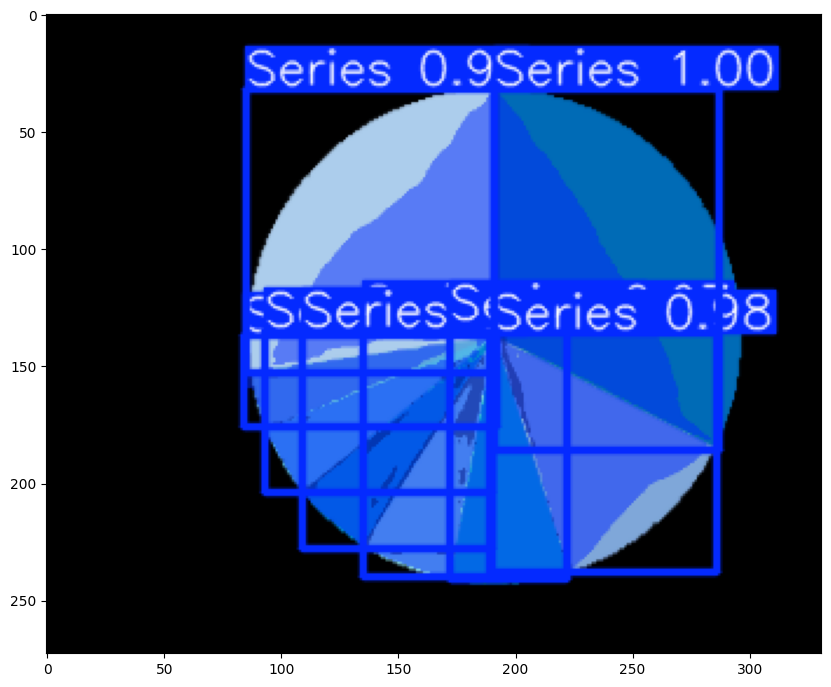

In [ ]:
# convert rgb to rgba 
image = cv2.imread("./../assets/images/pie_segmented.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.savefig("./../assets/images/pie_segmented.png")

In [ ]:
masks = results.masks.data

# Convert masks to numpy
masks = masks.cpu().numpy()
masks

array([[[          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        ...,
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0]],

       [[          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        ...,
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,        

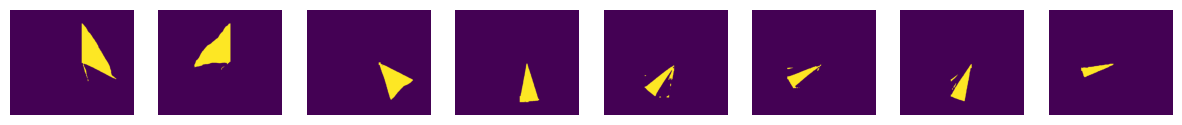

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, len(masks), figsize = (15, 15))
ax = ax.flatten()
for i, mask in enumerate(masks):
    ax[i].imshow(mask)
    ax[i].axis("off")
plt.show()
plt.savefig("./../assets/images/pie_segmented_masks.png")